# Понятие функции действительного аргумента. Предел функции, непрерывность, производная и ее геометрический смысл.

Источники:

- Ильин В. А., Позняк Э.Г. "Основы математического анализа"


- Бутузов В.Ф. "Лекции по математическому анализу"

# 1. Понятие функции

Пусть $\mathbf{X}$ - некоторое числовое множество. Если каждому значению $x \in \mathbf{X}$ ставится в соответствие по некоторому известному закону число $y$, то говорят, что на множестве $\mathbf{X}$ задана **функция** $y = f(x)$. При этом множество $\mathbf{X}$ называется **областью определения** функции $y = f(x)$, а множество $\mathbf{Y} = \Big\{y\Big| \exists x \in \mathbf{X}: f(x) = y\Big\}$ - **множеством значений**. Элемент $y$ из множества значений функции $\mathbf{Y}$ называется **частным значением** функции в точке $x$. 


Способы заданич функции:

1. **Аналитический**, т.е. когда функция задяется в явном виде формулой. 


   - *Квадратичная функция*: $\mathbf{X} = (-\infty, +\infty)$, $\mathbf{Y} = [0, +\infty)$. 

$$
y = x^{2}.
$$ 


   - *Функция знака*: $\mathbf{X} = (-\infty, +\infty)$, $\mathbf{Y} = \{-1, 0, 1\}$.

$$
y = sgn(x) = \begin{cases}
1, \text{ если } x > 0,\\
0, \text{ если } x = 0,\\
-1, \text{ если } x < 0.
\end{cases}
$$
   

2. **Графический**, т.е. когда зависимость между аргументом и функцией представляется графикиком.  


<img src="images/fun_ex.png">



3. **Табличный**. В этом случае пары $x, f(x)$ задаются в виде таблицы. Примером может служить расписание движения автобуса, которое определяет местоположение транспорта в определенные моменты времени указанные в расписании. 

   Если необходимо вычислить значение функции на каком-то промежуточном наборе данных, отсутствующем в таблице, то можно воспользоваться **интерполяцией**. Подробнее об интерполяции и ее методах можно прочесть в учебнике А.А.Самарского "Введение в численные методы". Про то, как интерполировать функции в python можно посмотреть [*здесь*](https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html)

### Пример интерполирования функции в Python

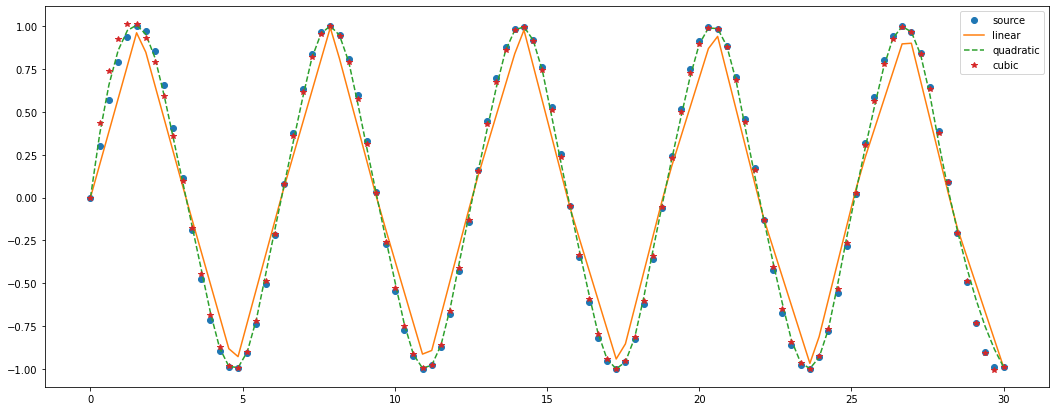

In [37]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

x = np.linspace(0, 30, 20)
y = np.sin(x)

f1 = interp1d(x, y, kind = 'linear')
f2 = interp1d(x, y, kind = 'quadratic')
f3 = interp1d(x, y, kind = 'cubic')

x_new = np.linspace(0, 30, 100)
y_new = np.sin(x_new)

fig, axs = plt.subplots(figsize = (18, 7), nrows = 1, ncols = 1)
axs.plot(x_new, y_new, 'o')
axs.plot(x_new, f1(x_new), '-')
axs.plot(x_new, f2(x_new), '--')
axs.plot(x_new, f3(x_new), '*')
axs.legend(['source', 'linear', 'quadratic', 'cubic'], loc = 'best')
plt.show()

### Сравнение рассмотренных методов интерполяции с помощью средней абсолютной ошибки (MAE)

$$
MAE = \frac{1}{n}\sum\limits_{i = 1}^{n}|fact_{i} - pred_{i}|,
$$

где $fact_{i}$ - значение исходной функции в точке $x_{i}$, $pred_{i}$ - значение, полученное с помощью интерполяции в точке $x_{i}$. 

In [54]:
print('\
MAE LINEAR    = {s[0]}\n\
MAE QUADRATIC = {s[1]}\n\
MAE QUBIC     = {s[2]}\n'.format(s = [abs(y_new - f1(x_new)).mean(),
                                      abs(y_new - f2(x_new)).mean(),
                                      abs(y_new - f3(x_new)).mean()]))

MAE LINEAR    = 0.13655533221526933
MAE QUADRATIC = 0.03192974594809624
MAE QUBIC     = 0.017792290015508173



### Задание 1 

- Найдите область определения и множество значений функции 
$$
y = \sqrt{4 - x^{2}}
$$


- В примере с интерполяцией замените $\sin{x}$ на $(\cos{x})^{2}$ и для каждого из трех рассмотренных методов рассчитайте корень из средней квадратичекой ошибки (RMSE) и округлите полученный результат до 3 - го знака:

$$
RMSE = \sqrt{\frac{1}{n}\sum\limits_{i = 1}^{n}(fact_{i} - pred_{i})^{2}}
$$

# 2. Предел функции

### Вспомогательные определения


Перед тем как переходить к описанию предела функции рассмотрим несколько вспомогательных определений. Для начала введем определение числовой последовательности и ее предела.

Если каждому $i \in \mathbb{N}$ ставится в соответствие некоторое вещественное значение $x_{i}$, то множество занумерованных вещественных чисел 

$$
x_{1}, x_{2}, \ldots, x_{n}, \ldots
$$

называется **числовой последовательностью**. Как правило, числовые последовательности обозначются следующим образом: $\{x_{n}\}$. Примером числовой последовательности является последовательность $\big\{x_{n} = \frac{1}{n}\big\}$

$$
\frac{1}{2}, \frac{1}{3}, \ldots, \frac{1}{n}, \ldots
$$

или последовательность $\big\{x_{n} = 2n - (-1)^{n}\big\}$

$$
3, 3, 7, 7, 11, 11, 15, 15, \ldots .
$$

Число $a$ называется **пределом** числовой последовательности, если существует $\varepsilon > 0$, такое, что начиная с некоторого $N$ выполняется следующие условие

$$
|x_{n} - a| < \varepsilon, \quad \forall n \ge N.
$$

При этом последовательность $\{x_{n}\}$ называется **сходящейся**. Известно, что если последовательность является сходящейся, то у нее существует только один предел.

$\varepsilon$ - окрестностью точки $a$ называется интервал $(a - \varepsilon, a + \varepsilon)$. **Проколотой** $\varepsilon$ - окрестностью точки $a$ называется множество $(a - \varepsilon, a) \cup (a, a + \varepsilon)$.

### Предел функции и его геометрический смысл


Рассмотрим функцию $y = f(x)$, определенную на некотором множестве $\mathbf{X}$ и точку $a$, которая может не принадлежать множеству $\mathbf{X}$, но в любой ее проколотой $\varepsilon$ - окрестности имеются точки из множества $\mathbf{X}$. 

Число $b$ называется **пределом функции** $y = f(x)$ в точке $x = a$ (или при $x \to a$), если для любой последовательности $\{x_{n}\}$ аргументов функции $f(x)$ сходящейся к $a$ и такой, что $x_{n} \neq a$ $\forall n$, соответствующая последовательность $\{f(x_{n})\}$ значений функции сходится к $b$. 

*Замечание.* Требование $x_{n} \neq a$ $\forall n$ в определении предела функции необходимо, поскольку функция $f(x)$ может быть не определена в точке $a$.

Аналогично пределу последовательности, если предел функции в точке существует, то он определен однозначно.

Чтобы понять геометрический смысл предела функции перепишем определение в форме Коши: Число $b$ называется **пределом функции** $y = f(x)$ в точке $x = a$, если $\forall \varepsilon > 0$ $\exists \delta > 0$, такое, что для любого значения аргумента $x$ из проколотой $\delta$ - окрестности точки $a$ выполняется неравенство $|f(x) - b| < \varepsilon$.

*Замечание.* Данное определение эквивалентно данному выше.

С геометрической точки зрения, существование $\lim_{x \to a}f(x) = b$ означает, что в пределах проколотой $\delta$ - окрестности точки $a$ график функции $f(x)$ лежит между прямыми $y = b - \varepsilon$ и $y = b + \varepsilon$.

<img src="images/geom_limit.png">

### Односторонние пределы


Число $b$ называется **правым пределом функции** $y = f(x)$ в точке $x = a$ (или при $x \to a + 0$), если для любой последовательности $\{x_{n}\}$ аргументов функции $f(x)$, сходящейся к $a$ и такой, что все элементы $x_{n}$ больше $a$, соответствующая последовательность $\{f(x_{n})\}$ значений функции сходится к $b$. Аналогичным образом определяется **левый предел функции** $y = f(x)$ в точке $x = a$ (или при $x \to a - 0$). Отличие лишь в том, что все элементы $x_{n}$ должны быть меньше $a$.

Если у функции существуют оба одностороннних предела в точке $a$ и они равны

$$
\lim_{x \to a - 0}f(x) = \lim_{x \to a + 0}f(x) = b,
$$

то у данной функции существует предел в точке $a$, который равен $b$. Если же хотя бы один из односторонних пределов функции $f(x)$ в точке $a$ не существует или существуют оба, но они не равны, то предел функции $f(x)$ в точке $a$ **не существует**.   

Пример:
- Функция знака 

$$
\lim_{x \to 0 - 0}sgn(x) = -1 \neq 1 = \lim_{x \to 0 + 0}sgn(x),
$$

$$
\lim_{x \to 0}sgn(x) \text{ - не существует}.
$$

### Предел на бесконечности
Число $b$ называется **пределом функции** $y = f(x)$ при $x \to +\infty$ ($x \to -\infty$), если для любого $\varepsilon > 0$ $\exists A$, такое, что для любого аргумента $x > A$ ($x < A$) выполняется условие $|f(x) - b| < \varepsilon$.

Пример:

- $\lim_{x \to -\infty} \frac{1}{x} = 0$

    Возьмем $A = -\frac{1}{\varepsilon}$, $\varepsilon > 0$. 
    
    Исходя из определения, необходимо показать, что для любого $x < A$ выполняется условие 
    
    $$|f(x) - b| < \varepsilon.$$ 
    
    В нашем случае, $f(x) = \frac{1}{x}$, $b = 0$. То есть нужно показать, что $\big|\frac{1}{x}\big| < \varepsilon$.
    
    Поскольку $x < A$, то $x < -\frac{1}{\varepsilon}$. Из этого следут, что во - первых, $\frac{1}{x} > -\varepsilon$, а во - вторых, в силу положительности ${\varepsilon}$, что $\frac{1}{x} < \varepsilon$, а это и означает, что $\big|\frac{1}{x}\big| < \varepsilon$.

### Замечательные пределы


При нахождении пределов сложных функций часто, в качестве промежуточных вычислений, используются два замечательных предела, представляющих собой неопределенности вида $\frac{0}{0}$ и $1^{\infty}$:  

- Первый замечательный предел: $\lim_{x \to 0}\frac{\sin{x}}{x} = 1$.
- Второй замечательный предел: $\lim_{x \to \infty}\Big(1 + \frac{1}{x}\Big)^{x} = e$.

Вывод данных соотношений можно найти, например, в учебнике Ильина на странице 134.

Примеры:

- $\lim_{x \to 0}\frac{\sin{2x}}{5x} = \lim_{x \to 0}\frac{\sin{2x}}{2x} \frac{2}{5} = \frac{2}{5}$.

- $\lim_{x \to \infty}\Big(1 + \frac{1}{7x}\Big)^{2x} = \lim_{x \to \infty}\Bigg(\Big(1 + \frac{1}{7x}\Big)^{7x}\Bigg)^{2/7} = e^{2/7}$.

### Пример отыскания пределов в python

In [84]:
from sympy import *
import math

x = Symbol('x')

display(limit(sin(x) / x, x, 0))
display(limit((1 + 1 / x)**x, x, math.inf))

print()
display(limit(sin(2*x) / (5 * x), x, 0))
display(limit((1 + 1 / (7 * x))**(2 * x), x, math.inf))


print()
display(limit(sign(x), x, 0, '-'))
display(limit(sign(x), x, 0, '+'))

1

E

2/5

exp(2/7)

-1

1

### Задание 2

Используя библиотеку *sympy* найдите следующие пределы:

- $\lim_{x \to 0}x^{x}$


- $\lim_{x \to 2}\frac{4x^{3} - 7x^{2} + 1}{3x^{3} + 2x^{2} - 9x + 12}$

# 3. Непрерывность функции. Классификация точек разрыва.


### Понятие непрерывности функции в точке


Пусть функция $f(x)$ определена в некоторой окрестности точки $a$. 

Функция $f(x)$ называется **непрерывной** в точке $a$, если у нее существует предел в этой точке равный частному значению $f(a)$:

$$
\lim_{x \to a}f(x) = f(a).
$$

Кроме того, поскольку $\lim_{x \to a}x = a$, для непрерывной функции справедливо следующее:

$$
\lim_{x \to a}f(x) = f\Big(\lim_{x \to a}x\Big).
$$

Пример:

- Функция $f(x) = \cos{x}$ непрерывна в точке 0.

    Действительно, $\lim_{x \to 0}\cos{x} = 1 = \cos{0}$
    
Функция $f(x)$ **непрерывна справа (слева)** в точке $a$, если

$$
\lim_{x \to a + 0}f(x) = f(a) \qquad \Big(\lim_{x \to a - 0}f(x) = f(a)\Big).
$$

Если функция $f(x)$ непрерывна в точке $a$ слева и справа, то она непрерывна в этой точке.

Пример:

- Функция $f(x) = [x]$, где $[x]$ - целая часть $x$, т.е. наибольшее целое число, не превосходящее $x$.

    Данная функция непрерывна справа в точках $n \in \mathbb{N}$, поскольку $f(n - 0) = n - 1$, $f(n) = n$ и $f(n + 0) = n$. В остальных точках функция непрерывна и справа, и слева.
    
<img src="images/cont_ex.png">    


### Непрерывность сложной функции

Пусть $x = \phi(t)$ и $y = f(x)$ - две произвольные функции, такие, что множество значений функции $x = \phi(t)$ является областью определения функции $y = f(x)$. 

Cуперпозиция этих функций $y = f(\phi(t))$ называется **сложной функцией**. 

Например, $y = \cos{\sqrt{(x^{2} - 4)}}$ или $y = \ln{(\sin{x})}$ и т.п.

Справедливо следующее утверждение: Если функция $x = \phi(t)$ непрерывна в точке $a$, а функция $y = f(x)$ непрерывна в точке $b = \phi(a)$, то сложная функция $y = f(\phi(t))$ непрерывна в точке $a$ (Ильин, стр. 113). 

### Классификация точек разрыва


Если функция не является непрерывной в точке, то данная точка является **точкой разрыва**.

Классификация точек разрыва:

- **Точка устранимого разрыва** - это такая точка, в которой существует предел функции, но он не равен частному значению функции в этой точке либо функция в этой точке не определена. Примером функции с устранимым разрывом является следующая:

$$
y = f(x) = \begin{cases}
\frac{\sin{x}}{x}, \text{ если } x \neq 0,\\
2, \text{ иначе}.
\end{cases}
$$

В данном случае имеется устранимый разрыв в точке $x = 0$, поскольку предел в этой точке равен 1, а частное значение равно 2. Данный разрыв можно устранить, переопределив частное значение функции $f(x)$ в точке $x = 0$ значением производной в данной точке.


- **Разрыв 1 - го рода** - это такая точка, в которой существуют односторонние пределы, отличные друг от друга. Примером функции с разрывом 1 - го рода является функция знака.


- **Разрыв 2 - го рода** - это такая точка, в которой не существует хотя бы одного одностороннего предела либо хотя бы один из них равен бесконечности. Примером функции с разрывом 2 - го рода является следующая:

$$
y = f(x) = \frac{x}{x^{2} - 1}.
$$

Данная функция имеет 2 точки разрыва 2 - го рода: $x = -1$ и $x = 1$. Действительно,

$$
\lim_{x \to -1 - 0}\frac{x}{x^{2} - 1} = -\infty, \quad \lim_{x \to -1 + 0}\frac{x}{x^{2} - 1} = +\infty,
$$
$$
\lim_{x \to 1 - 0}\frac{x}{x^{2} - 1} = -\infty, \quad \lim_{x \to 1 + 0}\frac{x}{x^{2} - 1} = +\infty.
$$


<img src="images/break_point.png"> 

### Задание 3 

Найти точки разрыва и определить их характер:

- $f(x) = 4x + \frac{|x - 3|}{x^{2} - x - 6}$


- $f(x) = e^{\frac{x}{x^{2} + x - 12}}$ 

# 4. Производная функции и ее дифференциал

Пусть функция $y = f(x)$ определена на интервале $(a, b)$. Рассмотрим две произвольные точки $x \in (a, b)$ и $x + \Delta x \in (a, b)$. 

**Приращением функции** $y = f(x)$ в точке $x$ называется разность

$$
\Delta y = f(x + \Delta x) - f(x).
$$

При этом величина $\Delta x$ называется **приращением аргумента** функции в точке $x$.

Используя введенное определение можно переписать условие непрерывности в следующем виде:

$$
\lim_{\Delta x \to 0}\Delta y = \lim_{\Delta x \to 0}\Big(f(x + \Delta x) - f(x)\Big) = 0.
$$

Если существует 

$$
\lim_{\Delta x \to 0}\frac{\Delta y}{\Delta x} = \lim_{\Delta x \to 0}\frac{f(x + \Delta x) - f(x)}{\Delta x},
$$

то он называется **производной функции** $y = f(x)$ в точке $x$ и обозначается $f^{'}(x)$ или $y^{'}(x)$.

### Физический смысл производной

Пусть функция $y = f(x)$ описывает зависимость пройденного пути $y$ от времени $x$. Тогда выражение, стоящее под знаком предела в определении производной будет определять среднюю скорость движения за интервал времени $\Delta x$. Устремляя интервал времени к нулю $\Delta x \to 0$, мы получим мгновенную скорость точки в момент времени $x$.  

### Геометрический смысл производной


Рассмотрим график произвольной функции $y = f(x)$. Зафиксируем значение аргумента $x_{0}$ и его приращение $\Delta x$. Через $M$ и $P$ обозначим точки графика функции $y = f(x)$ соответствующие значениям $x_{0}$ и $x_{0} + \Delta x$.

<img src="images/geom_deriv.png"> 

Прямая, проходящая через 2 точки графика называется **секущей**. Таким образом, прямая $MP$ - секущая к графику функции $y = f(x)$. Её уравнение легко получить из следующего соотношения:

$$
\frac{y - f(x_{0})}{x - x_{0}} = \frac{f(x_{0} + \Delta x) - f(x_{0})}{x_{0} + \Delta x - x_{0}} = \frac{\Delta y}{\Delta x} \Rightarrow y = f(x_{0}) + \frac{\Delta y}{\Delta x} (x - x_{0}).
$$

Устремляя $\Delta x \to 0$ мы получим, что с одной стороны, секущая переходит в касательную, а с другой стороны уравнение этой касательной:

$$
y = \lim_{\Delta x \to 0}\Big(f(x_{0}) + \frac{\Delta y}{\Delta x} (x - x_{0})\Big) = \lim_{\Delta x \to 0}\Big(\frac{\Delta y}{\Delta x}\Big)(x - x_{0}) + f(x_{0}) = f^{'}(x_{0})(x - x_{0}) + f(x_{0}).
$$

Таким образом, производная функции в некоторой точке $x$ является угловым коэффициентом касательной к графику данной функции в точке $x$.

### Дифференцируемость функции и дифференциал

Функция $y = f(x)$ называется **дифференцируемой** в точке $x$, если приращение $\Delta y$ этой функции в точке $x$, соответствующее приращению аргумента $\Delta x$, может быть представлено в виде

$$
\Delta y = A\Delta x + \alpha(\Delta x)\Delta x,
$$
где $A$ - некоторое число, не зависящее от $\Delta x$, а $\alpha$ - бесконечно малая функция при $\Delta x \to 0$, т.е. $\lim_{\Delta x \to 0}\alpha(\Delta x) = 0$. Например, функция $y = (x - a)^{m}$ является бесконечно малой в точке $a$. Величина $A\Delta x$ называется **главной частью** приращения дифференцируемой функции.

Существует теорема о том, что функция $y = f(x)$ дифференцируема в точке $x$ тогда и только тогда, когда она имеет в этой точке конечную производную (Ильин, стр. 162). Данная теорема позволяет отождествлять понятие дифференцируемости в данной точке с понятием существования у функции производной в этой же точке.

Перед тем, как переходить к понятию дифференциала функции сформулируем еще одно важное утверждение: Если функция $y = f(x)$ дифференцируема в точке $x$, то она непрерывна в этой точке. **Обратное неверно**. Примером является функция Вейерштрасса:

$$
w(x) = \sum\limits_{n = 0}^{+\infty}b^{n}\cos{(a^{n}\pi x)},
$$
где $a$ - произвольное нечётное число, не равное единице, а $b$ — положительное число, меньшее единицы. Пример реализации этой функции и ее график будут представлены ниже.

**Дифференциалом** функции $y = f(x)$ в данной точке $x$, соответствующим приращению аргумента $\Delta x$, называется главная линейная относительно $\Delta x$ часть приращения этой функции в точке $x$ и обозначается $dy$:

$$
dy = A\Delta x.
$$

Поскольку 

$$
f^{'}(x) = \lim_{\Delta x \to 0}\frac{\Delta y}{\Delta x} = \lim_{\Delta x \to 0}(A + \alpha(\Delta x)) = A,
$$

то выражение для дифференциала функции можно переписать в виде

$$
dy = f^{'}(x)\Delta x.
$$

### Геометрический смысл дифференциала 


Рассмотрим график произвольной функции $y = f(x)$. Введем следующие обозначения:

- $M$ и $P$ - точки на графике функции $y = f(x)$ соответствующие точкам $x$ и $x + \Delta x$;

- $MS$ - касательная к графику функции $y = f(x)$ в точке $M$;

- Точка $N$ такова, что $MN || Ox$ и $PN || Oy$;

- $Q$ - точка пересечения касательной $MS$ с прямой $PN$.


В этом случае, приращению функции $\Delta y$ будет соответствовать длина отрезка $NP$. Определим чему будет равен в наших обозначениях дифференциал $dy$. 

Для этого вспомним, что производная функции в точке совпадает с коэффициентом наклона касательной в этой точке, который равен тангенсу угла между касательной и осью $Ox$. В нашем случае это угол $\angle QMN$, т.е. $f^{'}(x) = \text{tg }{\angle QMN}$. Таким образом, если мы рассмотрим прямоугольный треугольник $MQN$, то согласно формуле для дифференциала функции он будет равен произведению тангенса угла между гипотенузой и катетом на прилежащий катет, а это в точности равно величине противолежащего катета, т.е. длине отрезка $QN$.

<img src="images/geom_dif.png">

### Реализация функции Вейерштрасса и ее график

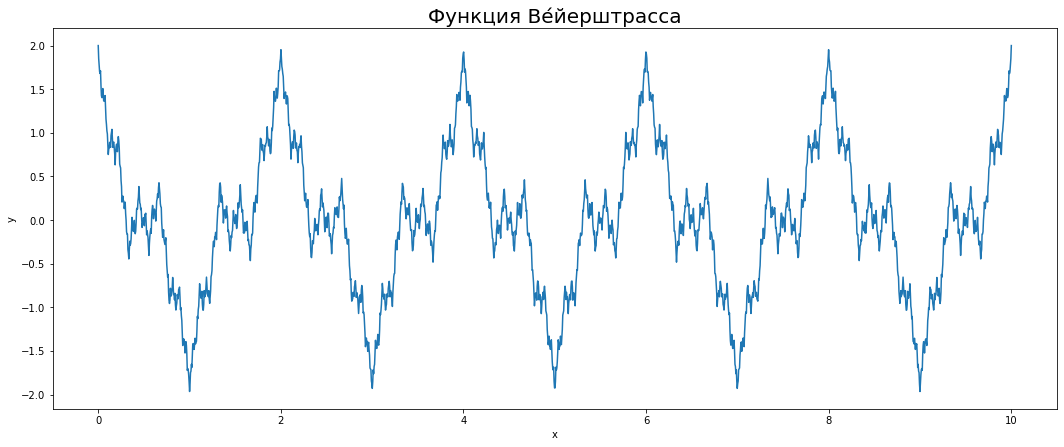

In [56]:
def weierstrassFunction(x, a = 3, b = 0.5, n = 100):
    
    n_list = range(n + 1)
    return list(map(lambda arg: sum(map(lambda i: b**i * np.cos(a**i * np.pi * arg), n_list)), x))

fig, axs = plt.subplots(figsize = (18, 7), nrows = 1, ncols = 1)

x = list(np.linspace(0, 10, 2000))
y = weierstrassFunction(x)
axs.plot(x, y)
axs.set_title("Функция Ве́йерштрасса", fontsize = 20)
axs.set_ylabel("y", fontsize = 10)
axs.set_xlabel("x", fontsize = 10)

plt.show()

### Правила дифференцирования суммы, разности, произведения и частного

Если каждая из функция $f(x)$ и $g(x)$ дифференцируема в данной точке $x$, то сумма, разность, произведение и частное этих функций (частное при условии, что $g(x) \neq 0$) также дифференцируемы в этой точке, причем имеют место формулы

$$
\big(f(x) \pm g(x)\big)^{'} = f^{'}(x) \pm g^{'}(x),
$$

$$
\big(f(x)g(x)\big)^{'} = f^{'}(x)g(x) + f(x)g^{'}(x),
$$

$$
\Bigg(\frac{f(x)}{g(x)}\Bigg)^{'} = \frac{f^{'}(x)g(x) - f(x)g^{'}(x)}{g^{2}(x)}.
$$

(Ильин, стр. 166).

Примеры:

- $y = x\cos{x}$

$$
y^{'}= (x)^{'}\cos{x} + x(\cos{x})^{'} = \cos{x} - x\sin{x}.
$$

- $y = \frac{\sin{x}}{2x + 1}$

$$
y^{'}= \frac{(\sin{x})^{'}(2x + 1) - \sin{x}(2x + 1)^{'}}{(2x + 1)^{2}} = \frac{(2x + 1)\cos{x} - 2\sin{x}}{(2x + 1)^{2}} = \frac{\cos{x}}{2x + 1} - \frac{2\sin{x}}{(2x + 1)^{2}}.
$$

### Производная сложной функции

Справедливо следующее утверждение: Если функция $x = \phi(t)$ дифференцируема в точке $a$, а функция $y = f(x)$ дифференцируема в точке $b = \phi(a)$, то сложная функция $y = f\big(\phi(t)\big)$ дифференцируема в точке $a$, причем для производной этой функции справедлива следующая формула:

$$
\Big(f\big(\phi(t)\big)\Big)^{'} = f^{'}(b)\phi^{'}(a).
$$

(Ильин, стр. 175). 

Примеры:

- $y = \ln{(\cos{x})}$

$$
y^{'}= \Big\{b = \cos{x}, a = x\Big\} = (\ln{x})^{'}\Big|_{b} (\cos{x})^{'}\Big|_{a} = \frac{1}{b}(-\sin{a}) = -\frac{\sin{x}}{\cos{x}} = -\text{tg(x)}
$$


- $y = \sqrt{\sin{x}}$

$$
y^{'}= \Big\{b = \sin{x}, a = x\Big\} = \big(\sqrt{x}\big)^{'}\Big|_{b} (\sin{x})^{'}\Big|_{a} = \frac{1}{2\sqrt{b}}\cos{a} = \frac{\cos{x}}{2\sqrt{\sin{x}}} 
$$

### Пример отыскания производной в python

In [87]:
display(diff(x*cos(x), x))
display(diff(x*cos(x), x).subs(x, 2))

print()
display(diff(sin(x) / (2*x + 1), x))

print()
display(diff(log(cos(x)), x))

print()
display(diff(sqrt(sin(x)), x))

-x*sin(x) + cos(x)

-2*sin(2) + cos(2)

cos(x)/(2*x + 1) - 2*sin(x)/(2*x + 1)**2

-sin(x)/cos(x)

cos(x)/(2*sqrt(sin(x)))

### Задание 4

Найдите производную функции и посчитайте ее значение в точке $a$:

- $f(x) = \frac{x^{3} - 2x}{\sqrt{x}}$, $a = 4$;


- $f(x) = \frac{1}{x - 4} + \cos{x} - \sqrt{x + 9}$, $a = 0$. 